<a href="https://colab.research.google.com/github/girlscodetoo-ch/AI-Arts/blob/main/IntroductionToAI/workshop_DE-Teil2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KS Stans Workshop - Künstliche Intelligenz und Kunst - Teil 2

Willkommen zum zweiten Teil des Kunst & Künstliche Intelligenz Workshop. In diesem so genannten _Notebook_ wirst du eine kurze Einführung in die Programmiersprache `Python` bekommen, wirst du erfahren, wie ein Computer Bilder sieht und lernen, wie man mit Künstlicher Intelligenz Kunst schaffen kann. Lasst uns loslegen!

## **Teil II** - Bilder in deinem Computer

![](https://raw.githubusercontent.com/girlscodetoo-ch/AI-Arts/main/IntroductionToAI/images/bits.jpg)

Wie sieht ein Computer eigentlich Farben und Bilder? Wenn wir etwas mit Kunst am Computer machen wollen, ist es wichtig, dass wir verstehen, wie Bilder im Computer verarbeitet werden.

### Wie laden wir ein Bild vom Internet in Python?

Wir werden damit anfangen, ein Bild in Python zu laden. Bitte führe die Zellen unten aus, damit alles später funktionieren wird.

In [ ]:
import tensorflow as tf # wir brauchen diese Bibliothek für die KI, die wir später machen werden
import os # eine weitere nützliche Bibliothek zum Durchsuchen deiner Dateien auf deinem Computer

In [ ]:
print(os.getcwd()) # Dies ist nützlich für den Ausbilder, wenn du im nächsten Schritt eine Fehlermeldung erhältst.

Im folgenden Code wird versucht, ein Bild von einer Website zu laden. Diese Website ist ein Link zu einem Bild auf unserer Github-Seite, und die Adresse wird: mit der Variablen `url` definiert. 


Mit der Bibliothek `request`, bitten wir diese Website, uns alle Informationen von dieser Website zu senden.



In [ ]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://raw.githubusercontent.com/girlscodetoo-ch/AI-Arts/main/images/dog.jpg'
response = requests.get(url)

Die Variable `response` ist die Information, die uns die Website was uns die Website geschickt hat, und im Folgenden werden wir ihren Inhalt `content` ausgeben

In [ ]:
response.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 75\n\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\xee\x04e\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb

Hoppla! Das sieht komisch aus. Jetzt sehen wir, was der Computer für das Bild hält: einen Strom von "Bytes" (viele 0en und 1en). So wird das Bild einfach gespeichert und kodiert. Wir müssen den Bytestrom jedoch *dekodieren* und lesen, damit der Computer das Bild verwenden kann. Glücklicherweise können wir eine Funktion verwenden, die diesen Bytestrom in etwas Lesbares umwandelt.

In [ ]:
image = tf.image.decode_image(response.content, channels=3)

In [ ]:
image

Das sieht schon ein bisschen besser aus. Mal sehen, ob wir das Bild auch noch anzeigen können.

In [ ]:
from matplotlib import pyplot as plt # eine Bibliothek, die du für die Erstellung von Figuren und Bildern nutzen kannst

plt.imshow(image)
plt.axis('off')
plt.show()

Schau mal! Hier haben wir unser Bild. Das ist vielleicht ein bisschen magisch für dich (oder auch nicht), aber wir werden dir ein bisschen mehr über die Programmierung mit diesen Bildern erklären.

Aber zuerst! Wir können bereits eine Funktion schreiben, mit der wir nicht alles kopieren müssen, wenn wir das nächste Mal ein Bild anzeigen wollen. Du kannst die Funktion unten ausführen.

In [ ]:
def display_image(image, **kwargs):
    plt.imshow(image, **kwargs)
    plt.axis('off')
    plt.show()

### Wie hängen die Zahlen mit dem Bild zusammen?

Wir werden dich Schritt für Schritt durch das führen, was in den Schritten zuvor passiert ist. Zuerst werden wir mal anfangen mit einer Übung. 

**Übung 6** Bitte führe den unten stehenden Code aus. Du brauchst nicht zu verstehen, was er macht. Das Feld, das darunter angezeigt wird, ist ein Notizblock zum Zeichnen. Versuche mal, mit der Maus den ersten Buchstaben deines Namens in das darunter liegende Notizfeld zu zeichnen. Wenn es nicht funktioniert, drücke auf `Finish`, führe dann die Zelle erneut aus und versuche es wieder.

In [ ]:
#@title
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d style="width:300px; height:300px; border:1px solid #000000;"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
ctx.scale(0.1, 0.1)
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='myletter.png', w=30, h=30, line_width=3):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)
draw()

376

Du hast gerade ein Bild mit dem Anfangsbuchstaben deines Namens erstellt, das auf Google Colab in der Datei `myletter.png` gespeichert ist. Du kannst das Bild in der Datei `myletter.png` mit dem folgenden Code laden.

In [ ]:
from PIL import Image
letter = np.asarray(Image.open('/content/myletter.png'))
letter[:, :, -1]

Vielleicht wirst du anfangen, manche Sachen zu erkennen. Das Bild was du vorher gezeichnet hast ist eigentlich eine Liste mit Zahlen. Oder genauer gesagt, eine Liste einer Liste mit Zahlen. 

Aber was sind diese Zahlen eigentlich? Diese Liste der Liste sind die Pixelwerte des Bildes. Je höher ein Pixelwert ist, desto dunkler ist die Farbe.

**Übung 7** Versuche mal herauszufinden, wie viele Pixel in dem obigen Bild enthalten sind. Zähle die Zahlen auf deinem Bildschirm nicht selbst, sondern lass den Computer das für dich tun. Wenn du unsicher bist, ist Google eine große Hilfe beim Programmieren. Du kannst zum Beispiel versuchen, nach "python shape of numpy array" zu suchen.

Wie du vielleicht schon bemerkt hast, reichen die Pixelwerte von 0 bis in den 200er-Bereich.

**Übung 8** Versuche mal, den niedrigsten und den höchsten Wert der Pixel in diesem Bild herauszufinden. Wenn du unsicher bist, wie das geht, suche dann bei Google nach "python numpy minimum maximum array".

Wir können dich sagen, dass der maximale Pixelwert dieses Bildes wahrscheinlich nahe bei 255 liegt. Aber warum gerade diese Zahl und nicht etwas einfacheres wie 100 oder 1000? Dazu müssen wir ein wenig tiefer in die Computergrundlagen eintauchen.

### Wie werden Pixel auf einem Computer gespeichert?

Wie du vielleicht schon mal gehört hast, in einem Computer wird alles in *Bits* gespeichert.

Ein *Bit* ist ein elektrisches Element im Computer, das entweder "an" oder "aus" sein kann. Für die Physikexperten unter uns: Es ist ein Halbleiter, der in der Lage ist, eine winzige Menge Strom zu leiten, wenn er "an" ist, aber nicht, wenn er "aus" ist. Wenn er "an" ist, hat er den Wert eins. Wenn er ausgeschaltet ist, hat er den Wert Null.

Wie kann mann damit Informationen auf einem Computer speichern? 

Wenn mann zwei Bits zusammen hat, versuche mal zu überlegen, wie viele verschiedene Kombinationen möglicher Werte diese Bits haben können. Es kann 0-0, 0-1, 1-0 und 1-1 sein, also 4 verschiedene Kombinationen sind möglich mit 2 Bits. 

Wenn wir nun ein weiteres Bit in der Mischung hinzufügen, also insgesamt 3 Bits, wie viele verschiedene Werte können diese Bits annehmen? Wenn du alles ausrechnest, wirst du feststellen, dass es insgesamt 8 verschiedene Kombinationen gibt. Vielleicht wirst du ein Muster zu erkennen. Für jedes Bit gibt es insgesamt 2 mögliche Werte. Wenn wir also 3 Bits haben, gibt es $2*2*2$ verschiedene Kombinationen von Bits. Das sind $2^3$ verschiedene Kombinationen von Bits.


In einem Computer werden normalerweise 8 Bits zu einem so genannten Byte zusammengefasst. 

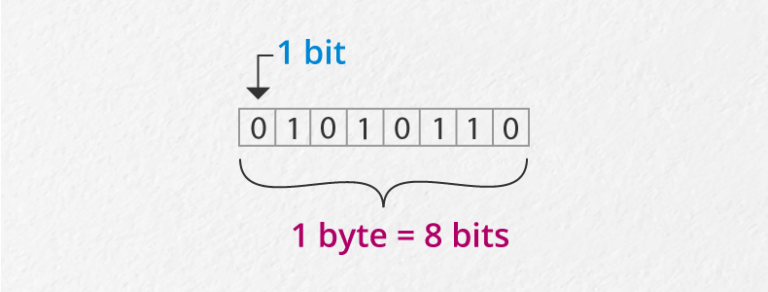

**Übung 9** Kannst du berechnen, wie viele verschiedene Werte ein Byte annehmen kann?

In [ ]:
#@title Gebe hier deine Antwort ein und drücke auf die Play-Taste, um deine Antwort zu überprüfen
answer = 0 #@param {type:"number"}

if answer == 256:
    print("Correct answer!")
else:
    print("Wrong answer, try again ;)")


Wie du vielleicht bemerkt hast, liegt die Anzahl der möglichen Werte nahe an dem maximalen Pixelwert, den du in Übung 8 gedruckt hast. Denke daran, dass wir in Python mit dem Zählen bei 0 beginnen.

Das bedeutet, dass jedes Pixel des Bildes in einem Byte gespeichert ist, das 256 verschiedene Werte annehmen kann. Je höher die Zahl, desto dunkler ist die Farbe des Pixels. Jetzt solltest du fast verstehen können, wie Bilder auf einem Computer gespeichert werden. Es gibt jedoch einen Teil, über den wir noch nicht gesprochen haben. Wir haben uns nämlich nicht mit farbigen Bildern beschäftigt, sondern nur mit Schwarz-Weiß-Bildern. Lassen Sie uns also einen Blick auf farbige Bilder werfen.

### Wie werden farbige Bilder auf einem Computer gespeichert?

Wir werden das Bild des Hundes und eine Liste der Nummern dieses Bildes anzeigen.

In [ ]:
#@title
np.set_printoptions(edgeitems=3, linewidth=75, 
    formatter=dict(float=lambda x: "%.3g" % x))

In [ ]:
# Zur Info, dies hätte man auch in zwei Linie lösen können
image_PIL = Image.open(BytesIO(response.content))
image_PIL

Gehen wir noch einmal darauf ein, wie das Bild geladen wird. Nachdem du das Bild dekodiert hast, erhältst du eine Liste mit Zahlen. Lass sie uns darunter noch einmal aufzeichnen.

In [ ]:
image = np.asarray(image_PIL)
image

Erkennst du etwas von früher wieder? Wenn du genau hinsiehst, erkennst du vielleicht, dass es sich um Listen von Listen von Listen handelt. Drei Mahl Listen? Puh, das ist kompliziert! Mal sehen, ob wir das für dich aufschlüsseln können. Wie wäre es, wenn wir uns zunächst die Form dieser Listen ansehen.

In [ ]:
print(image.shape)

Wir sehen hier, dass wir 3 Listen von Listen haben. Schauen wir uns jede von ihnen an.

In [ ]:
print("First list: ", image[:, :, 0])
print("\nSecond list: ", image[:, :, 1])
print("\nThird list: ", image[:, :, 2])

In [ ]:
from matplotlib import pyplot as plt
print("First list: ")
display_image(image[:, :, 0], cmap='Greys')
print("Second list: ")
display_image(image[:, :, 1], cmap='Greys')
print("Third list: ")
display_image(image[:, :, 2], cmap='Greys')

Fällt dir hier schon etwas auf? Tipp: Denke daran, dass ein Bild auf deinem Computer normalerweise in RGB (Rot Grün Blau) dargestellt wird. 

Diese Liste der Liste der Liste sind einfach die Pixelwerte in den roten, grünen und blauen Kanälen. Wenn du alle Farben zusammenzählen würdest, würdest du das Foto des Hundes erhalten, wie du es kennst. Die Form des Bildes ist hier 750 x 1125 Pixel.

Nachfolgend findest du eine Illustration dazu

![](https://github.com/girlscodetoo-ch/AI-Arts/blob/main/IntroductionToAI/images/RBG_overlay.png?raw=1)


Lass uns das Bild noch einmal ausdrucken. Jetzt kannst du wählen, welchen Kanal du sehen möchtest.

In [ ]:
#@title
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass

from ipywidgets import interact, widgets

def image_widget(channel):
    settings = dict(R = dict(cmap='Reds', axis=0),
                    G = dict(cmap='Greens', axis=1),
                    B = dict(cmap='Blues', axis=2))
    display_image(image[:, :, settings[channel]['axis']], 
                      cmap=settings[channel]['cmap'])
    
_ = interact(image_widget, channel=['R', 'G', 'B'])

interactive(children=(Dropdown(description='channel', options=('R', 'G', 'B'), value='R'), Output()), _dom_cla…

Die Kombination von rotem, grünem und blauem Licht ist die Standardmethode zur Erzeugung von Farbbildern auf Bildschirmen wie Fernsehern, Computermonitoren und Smartphone-Bildschirmen. Das RGB-Farbmodell ist ein "additives" Modell. Wenn 100% jeder Farbe zusammengemischt werden, entsteht weißes Licht. Wenn 0% jeder Farbe gemischt werden, entsteht kein Licht, sondern Schwarz.

**Wie viele Farben können mit RGB erstellt werden?**

Die Anzahl der von RGB unterstützten Farben hängt davon ab, wie viele mögliche Werte für Rot, Grün und Blau verwendet werden können. Dies wird als "Farbtiefe" bezeichnet und in Bits gemessen. Die gängigste Farbtiefe ist die 24-Bit-Farbe, die auch als "True Color" bezeichnet wird. Sie unterstützt 8 Bits für jede der 3 Farben, also insgesamt 24 Bits. Das ergibt 28 bzw. 256 mögliche Werte für Rot, Grün und Blau. 256 x 256 x 256 = 16.777.216 mögliche Farben in der "true color"-Palette.

Im vergleich: Das menschliche Auge kann nur etwa sieben Millionen Farben unterscheiden, daher werden Farbtiefen über 24 Bit nur selten verwendet.

### Zusätzliche Übungen 

Jetzt wollen wir kurz rekapitulieren und ein paar Übungen für dich machen. Wenn du ein Bild einliest, gibt es zwei Schritte: 

1. **Einlesen der Bytes**
2. **Dekodierung der Bytes in Pixelwerte**

**Übung 10** Erinnerst du dich an die Codezeilen davor, die das getan haben? Versuche nun, deine eigene Funktion zu schreiben, die diese Bilder einliest. Wir haben bereits einen Teil des Codes unten bereitgestellt. In die Funktion geht die Dateipfadvariable `filepath` ein, die dir sagen soll, wo sich dein Bild befindet, und sie soll eine Bildvariable `image` zurückgeben, die die Pixelwerte deines Bildes enthält.

In [ ]:
def read_image(filepath):
    
    return image

Als letzte Übung dieses Teils werden wir die Bilder verwenden, die du zuvor geladen hast, gespeichert in den Variabelen `image` und `letter`. 

**Übung 11** Versuche die Bilder `image` und `letter` mit Hilfe der zuvor gelernten Informationen dunkler zu machen, und zeige sie dann unten an.

In [ ]:
dark_image = image # fill in your solution here

In [ ]:
dark_letter = letter # fill in your solution here

In [ ]:
display_image(dark_image)

In [ ]:
display_image(dark_letter)

Wenn du diese Übungen erfolgreich abgeschlossen hast, ist das eine tolle Leistung. Du machst hier wirklich Fortschritte. Auch wenn es etwas schwieriger ist, denk daran, dass viele Leute lange brauchen, um es zu meistern, und du hast gerade erst angefangen. Und wenn du nach dem Workshop weiter programmieren willst, können wir dir sagen, dass Google dein Freund sein wird 😄

Jetzt lass uns mit dem KI Teil weitermachen!

# Et voilà! Ihr habt es geschafft! 

# Weitere Beispiele

Falls ihr noch nicht genug habt, könnte ihr auch gerne hier malreinschauen: 

- https://medium.com/@hannalee/art-creator-25fda3c35d8b
- https://medium.com/@ecyy/tensorflow-hub-create-an-artistic-picture-by-a-ml-app-e21308c7db1b

Viel Spass und vielen Dank, dass ihr bis zum Ende alles gegeben habt! 